In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numba
%matplotlib inline
from IPython.html import widgets
from IPython.display import Audio

In [25]:
N = 1024
L = 10.0
v = 1.0
dx = L / N
dt = dx / v

In [26]:
u1 = np.empty(N, np.float32)
u2 = np.empty_like(u1)
x = np.linspace(0, L, N)

In [36]:
# Pluck the string at point i = 157
u1[:157] = np.linspace(0, 1, 157, endpoint=False)
u1[157:] = np.linspace(1, 0, N - 157)
#u1[:] = np.sin(np.pi * x / L)
u2[:] = u1


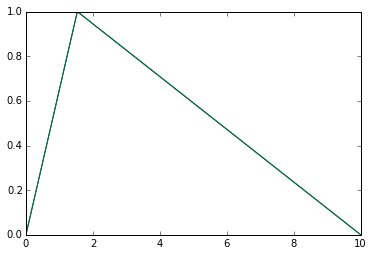

In [37]:
plt.plot(x, u1)
plt.plot(x, u2)

In [38]:
@numba.jit(nopython=True)
def propagate(nsteps, recinterval, u1, u2):
    nrec = nsteps // recinterval + 1
    tstore = np.empty(nrec)
    ustore = np.empty((nrec, N), np.float32)
    istore, t = 0, 0.0
    # Store the initial snapsho
    tstore[istore] = t
    for i in range(N):
        ustore[istore, i] = u1[i]
    a = v * dt / dx
    for istep in range(nsteps):
        # Decide which is the old and new wavefunction array
        if (istep % 2 == 0):
            uold, unew = u1, u2
        else:
            uold, unew = u2, u1
        # Update new wave function
        for i in range(1, N - 1):
            unew[i] = 2 * (1 - a) * uold[i] - unew[i] \
                    + a * (uold[i + 1] + uold[i - 1])
        t = t + dt
        # Store a snapshot every recinterval
        if ((istep + 1) % recinterval == 0):
            istore += 1
            tstore[istore] = t
            for i in range(N):
                ustore[istore, i] = unew[i]
    return tstore, ustore

In [39]:
NSTEPS, RECINT = 2000, 10
tstore, ustore = propagate(NSTEPS, RECINT, u1, u2)

In [40]:
def plot_wave(t):
    # First find the step
    istep = np.where(tstore >= t)[0][0]
    istep = min(istep, NSTEPS - 1)
    plt.plot(x, ustore[istep,:])
    plt.ylim(-1.2, 1.2)

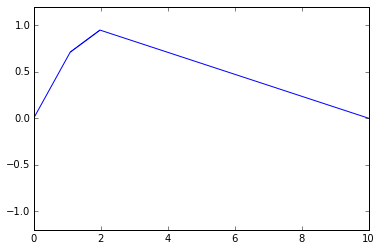

In [41]:
widgets.interact(plot_wave, t=widgets.FloatSliderWidget(min=0, max=tstore[-1], step=tstore[1], value=0));

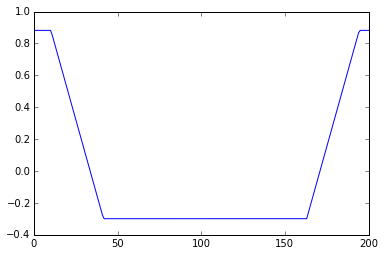

In [45]:
# Grab wave at a point for a sound
s = ustore[:,259]
plt.plot(s)

In [46]:
# Repeat the wave for 5 s at 440 Hz
s = np.tile(s, 440 * 3)

In [47]:
# Make this a 440 Hz sound
framerate = len(s) / 3
Audio(s,rate=framerate)